Loan SARAZIN & Anna MARIZY

# Simulations de Variables Aléatoires

## Générateur fondé sur l’inverse généralisée

In [35]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss
#from scipy.stats import uniform
#from scipy.stats import expon

In [2]:
def generalized_inverse(invF, n) :
    """Génère n échantillons selon la densité f = invF en utilisant l'inverse généralisé
    
    Args:
        invF (IDK): Inverse de la fonction de répartition
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    u = ss.uniform.rvs(loc=0, scale=1, size=n)
    return invF(u)

Soit $X$ une variable aléatoire suivant une loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est :
$$F(x)=1-\exp(-\lambda x)$$
L'inverse généralisé de $F$ est :
$$F^{-1}(u)=-\frac{1}{\lambda}\ln(1-u)$$

In [3]:
def invExp(u, Lambda) :
    return -np.log(1-u)/Lambda

Lambda = 2
nbEchantillon = 10000

x = generalized_inverse(lambda x : invExp(x, Lambda), nbEchantillon)

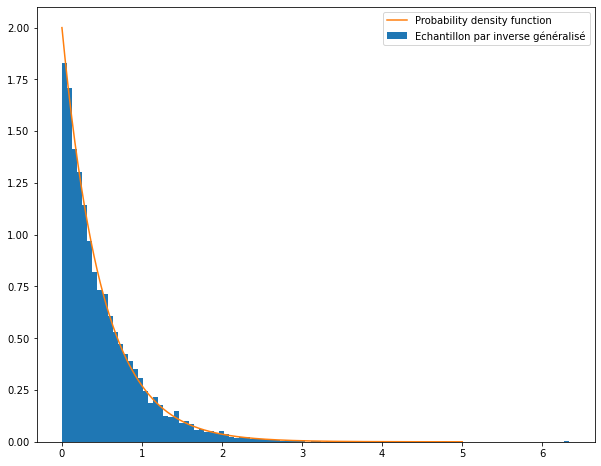

In [4]:
t = np.linspace(0, 5, 1000)
z = ss.expon.pdf(t, loc=0, scale=1/Lambda)

plt.figure(figsize=(10, 8))
plt.hist(x, bins=100, density=True, label='Echantillon par inverse généralisé')
plt.plot(t, z, label='Probability density function')
plt.legend()
plt.show()

Pour utiliser cet algorithme, il faut connaitre l'inverse généralisé de la fonction de répartition $F$, afin de générer
échantillon selon la densité $f(x)=F'(x)$.  
En pratique il n'est pas souvent possible d'accéder à cet inverse généralisé.

## Générateur Accept-Reject

In [5]:
def acceptReject(f, g, M, n) :
    """
    Génère un échantillon de variables aléatoires selon la densité f = invF en utilisant l'inverse généralisé
    
    Args:
        f (function) :
        g (funtion) :
        M (float) :
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    X = []
    k = 0
    for i in range(n) :
        u = ss.uniform.rvs(loc=0, scale=1)
        x = g.rvs(loc=0, scale=1)
        while (f.pdf(x, loc=0, scale=1)/(M*g.pdf(x, loc=0, scale=1))) < u :
            u = ss.uniform.rvs(loc=0, scale=1)
            x = g.rvs(loc=0, scale=1)
            k += 1
        X.append(x)
    print(f"{k} échantillons ont été rejetés pour échantilloner {n} échantillons")
    return(np.array(X))

In [6]:
M = 5

X100 = acceptReject(ss.norm, ss.cauchy, M, 100)
X1000 = acceptReject(ss.norm, ss.cauchy, M, 1000)

421 échantillons ont été rejetés pour échantilloner 100 échantillons
3653 échantillons ont été rejetés pour échantilloner 1000 échantillons


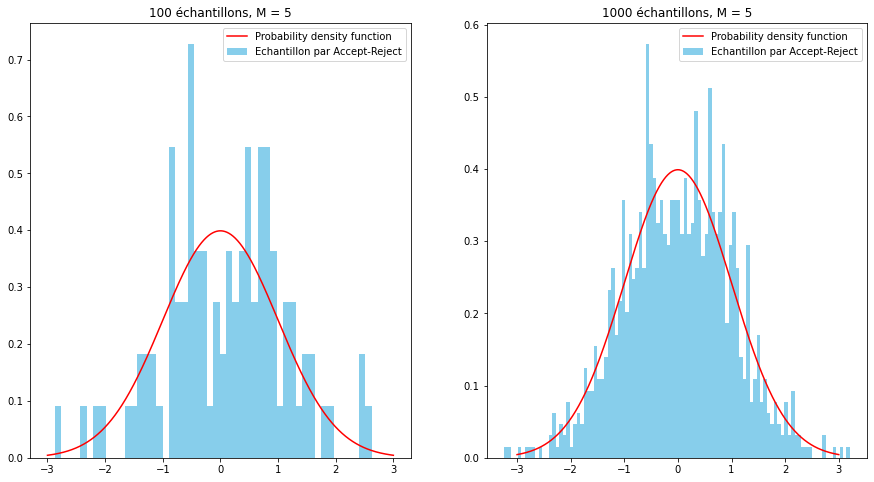

In [7]:
t = np.linspace(-3, 3, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121)
ax1.hist(X100, bins=50, color="skyblue", density=True, label='Echantillon par Accept-Reject')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"100 échantillons, M = {M}")

ax2 = fig.add_subplot(122)
ax2.hist(X1000, bins=100, density=True, color="skyblue", label='Echantillon par Accept-Reject')
ax2.plot(t, z, color='r', label='Probability density function')
ax2.legend()
ax2.set_title(f"1000 échantillons, M = {M}")
plt.show()

In [8]:
M = np.sqrt(2*np.pi/np.e)

X100 = acceptReject(ss.norm, ss.cauchy, M, 100)
X1000 = acceptReject(ss.norm, ss.cauchy, M, 1000)
X10000 = acceptReject(ss.norm, ss.cauchy, M, 10000)

61 échantillons ont été rejetés pour échantilloner 100 échantillons
494 échantillons ont été rejetés pour échantilloner 1000 échantillons
5252 échantillons ont été rejetés pour échantilloner 10000 échantillons


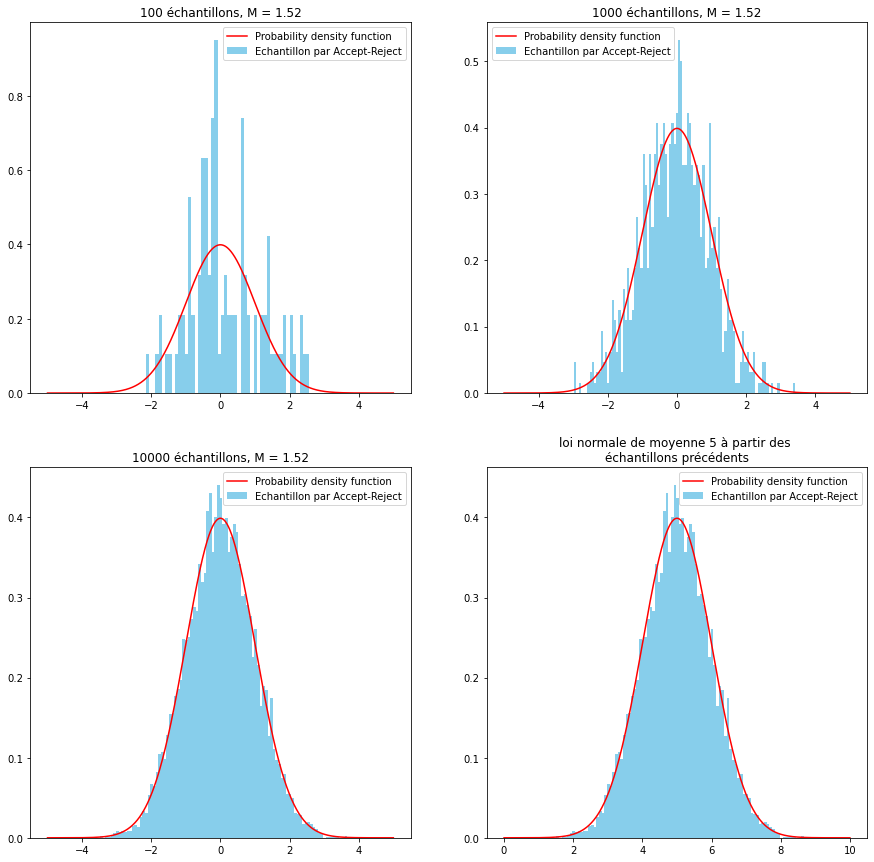

In [9]:
t = np.linspace(-5, 5, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.hist(X100, bins=50, color="skyblue", density=True, label='Echantillon par Accept-Reject')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"100 échantillons, M = {M:.2f}")

ax2 = fig.add_subplot(222)
ax2.hist(X1000, bins=100, density=True, color="skyblue", label='Echantillon par Accept-Reject')
ax2.plot(t, z, color='r', label='Probability density function')
ax2.legend()
ax2.set_title(f"1000 échantillons, M = {M:.2f}")

ax3 = fig.add_subplot(223)
ax3.hist(X10000, bins=100, density=True, color="skyblue", label='Echantillon par Accept-Reject')
ax3.plot(t, z, color='r', label='Probability density function')
ax3.legend()
ax3.set_title(f"10000 échantillons, M = {M:.2f}")

t = t + 5
z = ss.norm.pdf(t, loc=5, scale=1)

ax4 = fig.add_subplot(224)
ax4.hist(X10000 + 5, bins=100, color="skyblue", density=True, label='Echantillon par Accept-Reject')
ax4.plot(t, z, color='r', label='Probability density function')
ax4.legend()
ax4.set_title(f"loi normale de moyenne 5 à partir des \néchantillons précédents")
plt.show()

La méthode d'accept-reject permet bein d'échantilloner $X $suivant la densité $f(x)$, sachant que l'on connaît
une densité g(x) à partir de laquelle on sait échantillonner et qui est telle que :
$$f(x)\leq Mg(x)$$
Cependant, si $M$ n'est pas bien choisi, l'algorithme n'est pas optimal puisque $x$ est accepté avec une probabilité $\frac{1}{M}. On voit de plus avec les histogrammes tracés ci-dessus qu'un nombre élevé d'échantillon est nécessaire pour que l'ensemble des échantillons approchent la densité de probabilité souhaitée.

A partir d'un nombre conséquent d'échantillons suivant une loi normale centrée réduite, obtenus aec la méthode d'accept-reject, il est facile de calculer 10000 échantillons distribués suivant une loi normale de moyenne 5.

## Méthode de Box-Muller pour des lois normales univariées

In [41]:
def boxMuller(n) :
    """Génère n échantillons à partir de la loi normale bivariée réduite
    
    Args:
        n (int): Sample size wanted
        
    Returns:
        array: Array of n samples
    """
    Z = []
    for i in range(n) :
        u1, u2 = ss.uniform.rvs(loc=0, scale=1, size=2)
        R, V = -2*np.log(u1), 2*np.pi*u2
        z1, z2 = np.sqrt(R)*np.cos(V), np.sqrt(R)*np.sin(V)
        Z.append([z1, z2])
    return(np.array(Z))

Lors de l'éxécution de la méthode de Box-Muller, on obtient deux échantillons qui suivent une loi normale univariée. 

In [43]:
nbEchantillon = 10000

Z = boxMuller(nbEchantillon//2)

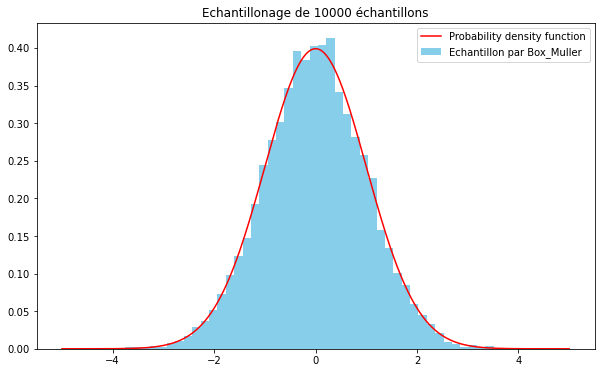

In [46]:
t = np.linspace(-5, 5, 1000)
z = ss.norm.pdf(t, loc=0, scale=1)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(np.ravel(Z), bins=50, color="skyblue", density=True, label='Echantillon par Box_Muller')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"Echantillonage de {nbEchantillon} échantillons")
plt.show()

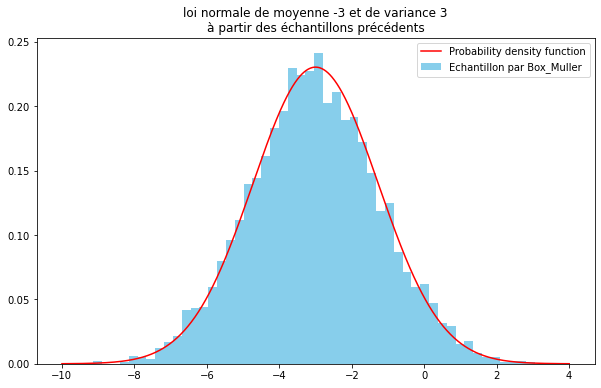

In [47]:
nbEchantillon = 5000
Z = boxMuller(nbEchantillon//2)

t = np.linspace(-10, 4, 1000)
z = ss.norm.pdf(t, loc=-3, scale=np.sqrt(3))

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(np.ravel(Z*np.sqrt(3)-3), bins=50, color="skyblue", density=True, label='Echantillon par Box_Muller')
ax1.plot(t, z, color='r', label='Probability density function')
ax1.legend()
ax1.set_title(f"loi normale de moyenne -3 et de variance 3\nà partir des échantillons précédents")
plt.show()

## Générer des échantillons d’une loi normale multivariée

In [149]:
def multivarie(n, mu, sigma) :
    Ztot = []
    for i in range(n) :
        Z = np.reshape(boxMuller(mu.size//2), (mu.size, 1))
        A = la.cholesky(sigma)
        Ztot.append(mu + A @ Z)
    return(np.array(Ztot))

In [152]:
nbEchantillon = 1000
mu = np.array([[0], [50], [100], [-50], [-100], [200]])
sigma = np.array([[11, 10, 5, 9, 4, 2],
                [10, 13, 9, 15, 5, 3],
                [5, 9, 15, 11, 3, 1],
                [9, 15, 11, 21, 6, 4],
                [4, 5, 3, 6, 5, 1],
                [2, 3, 1, 4, 1, 1]])

Z = multivarie(nbEchantillon, mu, sigma)

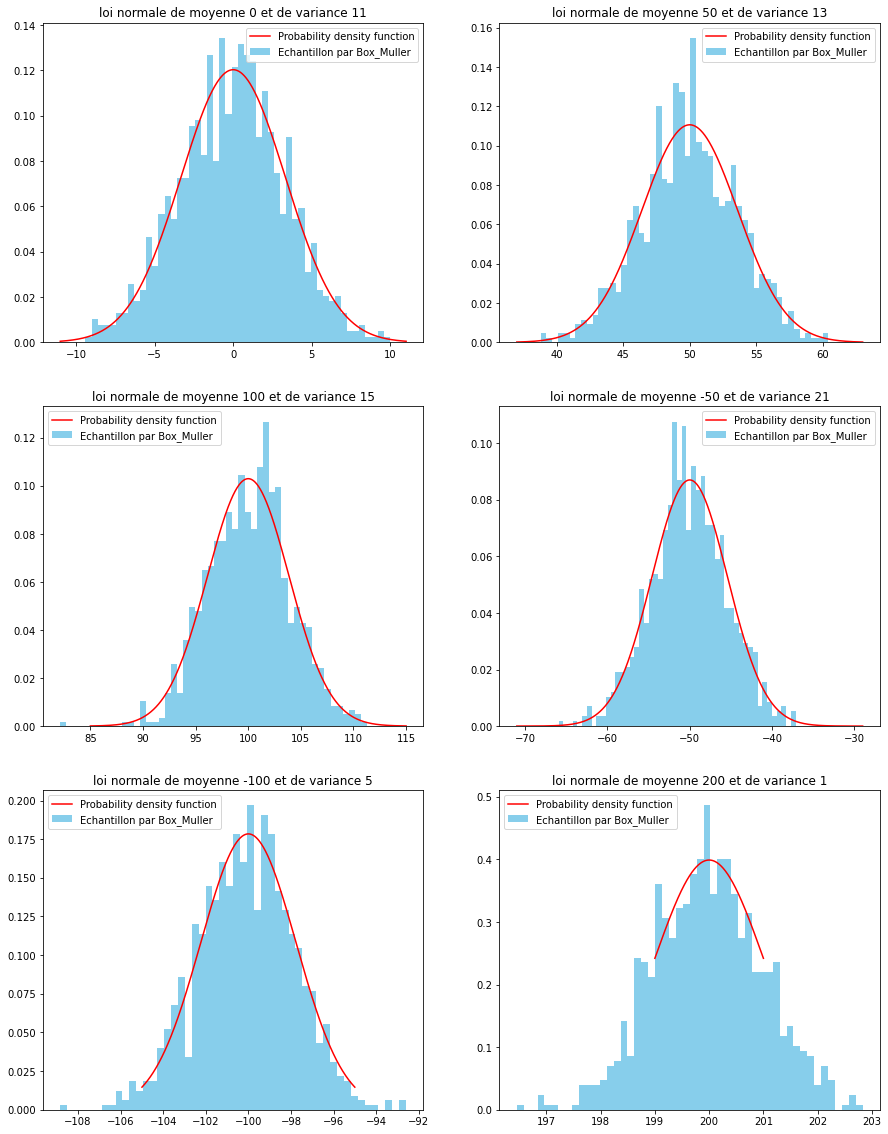

In [153]:
fig = plt.figure(figsize=(15, 20))
for i in range(mu.size) :
    t = np.linspace(mu[i][0] - sigma[i][i], mu[i][0] + sigma[i][i], 1000)
    z = ss.norm.pdf(t, loc=mu[i][0], scale=np.sqrt(sigma[i][i]))
    
    ax = fig.add_subplot(3, 2, i + 1)
    ax.hist(np.ravel(Z[:, i]), bins=50, color="skyblue", density=True, label='Echantillon par Box_Muller')
    ax.plot(t, z, color='r', label='Probability density function')
    ax.legend()
    ax.set_title(f"loi normale de moyenne {mu[i][0]} et de variance {sigma[i][i]}")
plt.show()

## Echantillonner suivant une loi de Bernouilli

In [154]:
def Binomial(n, p) :
    X = []
    for i in range(n) :
        u = ss.uniform.rvs(loc=0, scale=1)
        if u < p :
            X.append(0)
        else :
            X.append(1)
    return(np.array(X))

In [155]:
nbEchantillon = 1000
p = 0.7

Z = Binomial(nbEchantillon, p)

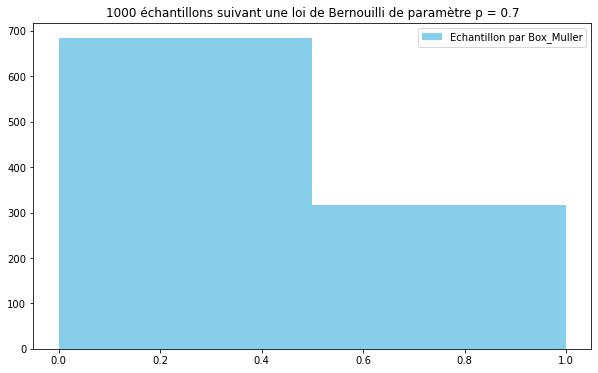

La fréquence de zéros dans cette série d'échantillons est de 0.684


In [163]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.hist(Z, bins=2, color="skyblue", density=False, label='Echantillon par Box_Muller')
ax1.legend()
ax1.set_title(f"{nbEchantillon} échantillons suivant une loi de Bernouilli de paramètre p = {p}")
plt.show()

n = (Z.size - np.count_nonzero(Z))/Z.size
print(f"La fréquence de zéros dans cette série d'échantillons est de {n}")

S'arrêter à l'algorithme de Metropolis-Hastings